In [3]:
import math
import csv
import rebound
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
from IPython.display import display, clear_output

In [4]:
def storeValues(fileName, p_choice):
    with open(fileName, mode='w') as data_file:
        data_writer = csv.writer(data_file, delimeter=',', quotechar='"', quoting=csv.QUOTE_MINIMAL)
        data_writer.writerow(['m', 'x', 'y', 'z', 'vx', 'vy', 'vz'])
        for i in range(len(times)):
            data_writer.writerow([sim.particles[p_choice].m, sim.particles[p_choice].x, sim.particles[p_choice].y, sim.particles[p_choice].z, sim.particles[p_choice].vx, sim.particles[p_choice].vy, sim.particles[p_choice].vz])

In [9]:
sim = rebound.Simulation()

sim.add(["Sun", "Mercury", "Venus", "Earth", "Mars"],date="2017-09-04 00:00")
sim.save("ss.bin")
sim.add(["Jupiter", "Saturn", "Uranus", "Neptune"],date="2017-09-04 00:00")
sim.save("full_ss.bin")

Searching NASA Horizons for 'Sun'... Found: Sun (10).
Searching NASA Horizons for 'Mercury'... Found: Mercury Barycenter (199).
Searching NASA Horizons for 'Venus'... Found: Venus Barycenter (299).
Searching NASA Horizons for 'Earth'... Found: Earth-Moon Barycenter (3).
Searching NASA Horizons for 'Mars'... Found: Mars Barycenter (4).
Searching NASA Horizons for 'Jupiter'... Found: Jupiter Barycenter (5).
Searching NASA Horizons for 'Saturn'... Found: Saturn Barycenter (6).
Searching NASA Horizons for 'Uranus'... Found: Uranus Barycenter (7).
Searching NASA Horizons for 'Neptune'... Found: Neptune Barycenter (8).


In [8]:
sim=rebound.Simulation()
sim.add("Earth")

Searching NASA Horizons for 'Earth'... Found: Earth-Moon Barycenter (3).


In [59]:
sim = rebound.Simulation("ss.bin")
sim.add(primary=sim.particles[0],
        m=6.538e-17, 
        a=0.9976970059775866,
        e=0.5148441284523386,
        inc=19.80627854737007 * np.pi/180., 
        pomega=43.83758142464817 * np.pi/180.) # cruithne JPL values inc and pomega converted to radians

sim.status()

---------------------------------
REBOUND version:     	3.12.1
REBOUND built on:    	Feb 13 2020 23:13:03
Number of particles: 	6
Selected integrator: 	ias15
Simulation time:     	0.0000000000000000e+00
Current timestep:    	0.001000
---------------------------------
<rebound.Particle object, m=1.0 x=-0.007139143380212697 y=-0.002792019770161695 z=0.0002061838852554664 vx=0.00031241890630844004 vy=-0.0004308175076914913 vz=-5.477740167511035e-06>
<rebound.Particle object, m=1.6601141530543488e-07 x=-0.1478672233442572 y=-0.4466929775364947 z=-0.02313937582786785 vx=1.2309105821421804 vy=-0.41305345498361457 vz=-0.14666379884253236>
<rebound.Particle object, m=2.4478382877847715e-06 x=-0.7257693602841775 y=-0.02529582082587794 z=0.041378025262080086 vx=0.030165331589789884 vy=-1.1808763946096659 vz=-0.017862281779832963>
<rebound.Particle object, m=3.040432648022642e-06 x=-0.17568959237103887 y=0.9659716389047319 z=0.00020503203579145908 vx=-1.001310146440286 vy=-0.17559977987521952 vz=

(<Figure size 576x576 with 3 Axes>,
 <matplotlib.axes._axes.Axes at 0x1175a36d0>)

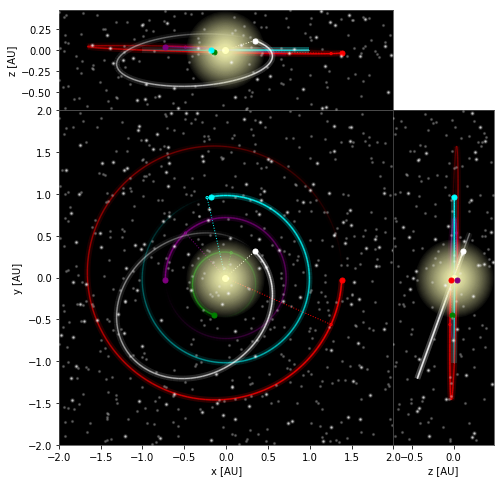

In [14]:
rebound.OrbitPlot(sim, fancy=True, slices=0.3, unitlabel="[AU]", color=['green','purple','cyan','red','white'], periastron=True, xlim=[-2.,2.], ylim=[-2.,2.])

In [27]:
# Value check the final printed values should bare close similarity to the initial values
times = 800 * 5

sim.status()

merc_init = [sim.particles[1].x, sim.particles[1].y, sim.particles[1].z]
venu_init = [sim.particles[2].x, sim.particles[2].y, sim.particles[2].z]
eart_init = [sim.particles[3].x, sim.particles[3].y, sim.particles[3].z]
crui_init = [sim.particles[-1].x, sim.particles[-1].y, sim.particles[-1].z]
mars_init = [sim.particles[4].x, sim.particles[4].y, sim.particles[4].z]

merc_orb = 88.
venu_orb = 224.7
eart_orb = 365. # don't need crui_orb since roughly the same as earth
mars_orb = 687.


for t in range(times):
    sim.dt = sim.particles[3].P/(365.0 * 5.)
    sim.step()
    if t >= (merc_orb * 5) - 3 and t <= (merc_orb * 5) + 3:
        print("Mercury full orbit approx. 88: " + "t = " + str(t) + str(merc_init) + "\nx = " +
              str(sim.particles[1].x) + "\ny = " + str(sim.particles[1].y) +
              "\nz = " + str(sim.particles[1].z))
    elif t >= (venu_orb * 5) -3 and t <= (venu_orb * 5) + 3:
        print("Venus full orbit approx. 245: " + "t = " + str(t) + str(venu_init) + "\nx = " +
              str(sim.particles[2].x) + "\ny = " + str(sim.particles[2].y) +
              "\nz = " + str(sim.particles[2].z))
    elif t >= (eart_orb * 5) - 3 and t <= (eart_orb * 5) + 3:
        print("Earth full orbit approx. 365: " + "t = " + str(t) + str(eart_init) + "\nx = " +
              str(sim.particles[3].x) + "\ny = " + str(sim.particles[3].y) +
              "\nz = " + str(sim.particles[3].z))
        print("Cruithne full orbit approx. 365: " + "t = " + str(t) + str(crui_init) + "\nx = " +
              str(sim.particles[-1].x) + "\ny = " + str(sim.particles[-1].y) +
              "\nz = " + str(sim.particles[-1].z))
    elif t >= (mars_orb * 5) - 3 and t <= (mars_orb * 5) + 3:
        print("Mars full orbit approx. 687: " + "t = " + str(t) + str(mars_init) + "\nx = " +
              str(sim.particles[4].x) + "\ny = " + str(sim.particles[4].y) +
              "\nz = " + str(sim.particles[4].z))



---------------------------------
REBOUND version:     	3.12.1
REBOUND built on:    	Feb 13 2020 23:13:03
Number of particles: 	6
Selected integrator: 	ias15
Simulation time:     	0.0000000000000000e+00
Current timestep:    	0.001000
---------------------------------
<rebound.Particle object, m=1.0 x=0.0015628988384369235 y=0.006325448909479992 z=-0.00011441599293742326 vx=-0.00035652377881921986 vy=0.00027480492654261387 vz=8.563992604345354e-06>
<rebound.Particle object, m=1.6601141530543488e-07 x=0.2319100421215084 y=-0.35781741540016415 z=-0.05100155252054606 vx=1.055320965206941 vy=0.9549834039137307 vz=-0.018826722092931205>
<rebound.Particle object, m=2.4478382877847715e-06 x=0.6792785103531376 y=-0.25521864961568785 z=-0.04281067637459344 vx=0.4164665228221204 vy=1.0921191704636564 vz=-0.009067545192353903>
<rebound.Particle object, m=3.040432648022642e-06 x=-0.7646575486536414 y=0.6280833561637988 z=-0.00013755023838475316 vx=-0.6468081756872567 vy=-0.7800696118558638 vz=4.404

In [15]:
times = 365000
runs = 0
xdata0 = [] # Sun
ydata0 = []
xdata1 = [] # Mercury
ydata1 = []
xdata2 = [] # Venus
ydata2 = []
xdata3 = [] # Earth
ydata3 = []
xdata4 = [] # Mars
ydata4 = []
xdata5 = [] # Cruithne
ydata5 = []

print("INITIAL STATUS:")
sim.status()

for t in range(times):
    sim.dt = sim.particles[3].P/365.
    sim.step()
    #xdata0.append(sim.particles[0].x - sim.particles[3].x)
    #ydata0.append(sim.particles[0].y - sim.particles[3].y)
    #xdata1.append(sim.particles[1].x - sim.particles[3].x)
    #ydata1.append(sim.particles[1].y - sim.particles[3].y)
    #xdata2.append(sim.particles[2].x - sim.particles[3].x)
    #ydata2.append(sim.particles[2].y - sim.particles[3].y)
    #xdata3.append(sim.particles[3].x - sim.particles[3].x)
    #ydata3.append(sim.particles[3].y - sim.particles[3].y)
    #xdata4.append(sim.particles[4].x - sim.particles[3].x)
    #ydata4.append(sim.particles[4].y - sim.particles[3].y)
    xdata5.append(sim.particles[-1].x - sim.particles[3].x)
    ydata5.append(sim.particles[-1].y - sim.particles[3].y)

runs += times
print("FINAL STATUS:")
sim.status()


    

INITIAL STATUS:
---------------------------------
REBOUND version:     	3.12.1
REBOUND built on:    	Feb 13 2020 23:13:03
Number of particles: 	6
Selected integrator: 	ias15
Simulation time:     	0.0000000000000000e+00
Current timestep:    	0.001000
---------------------------------
<rebound.Particle object, m=1.0 x=-0.007139143380212697 y=-0.002792019770161695 z=0.0002061838852554664 vx=0.00031241890630844004 vy=-0.0004308175076914913 vz=-5.477740167511035e-06>
<rebound.Particle object, m=1.6601141530543488e-07 x=-0.1478672233442572 y=-0.4466929775364947 z=-0.02313937582786785 vx=1.2309105821421804 vy=-0.41305345498361457 vz=-0.14666379884253236>
<rebound.Particle object, m=2.4478382877847715e-06 x=-0.7257693602841775 y=-0.02529582082587794 z=0.041378025262080086 vx=0.030165331589789884 vy=-1.1808763946096659 vz=-0.017862281779832963>
<rebound.Particle object, m=3.040432648022642e-06 x=-0.17568959237103887 y=0.9659716389047319 z=0.00020503203579145908 vx=-1.001310146440286 vy=-0.17559

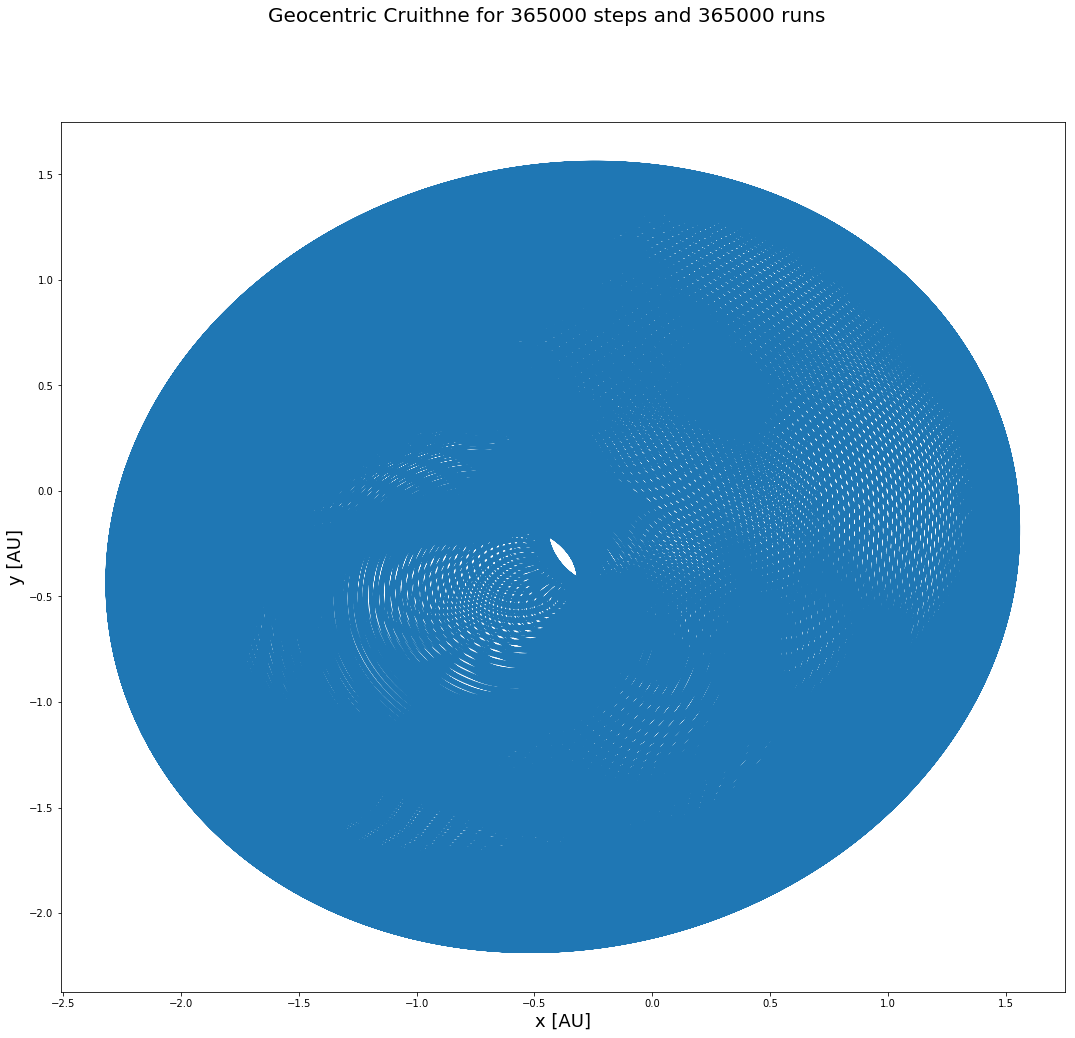

In [24]:
#plt.plot(xdata0,ydata0) # Sun
#plt.plot(xdata1,ydata1) # Mercury
#plt.plot(xdata2,ydata2) # Venus
#plt.plot(xdata3,ydata3) # Earth
#plt.plot(xdata4,ydata4) # Mars
#plt.plot(xdata5,ydata5) # Cruithne
#plt.show()

fig = plt.figure(figsize=(18, 16))
plt.plot(xdata5,ydata5)
fig.suptitle("Geocentric Cruithne for " + str(times) + " steps and " + str(runs) + " runs", fontsize=20)
plt.xlabel('x [AU]', fontsize=18)
plt.ylabel('y [AU]', fontsize=18)
plt.show()

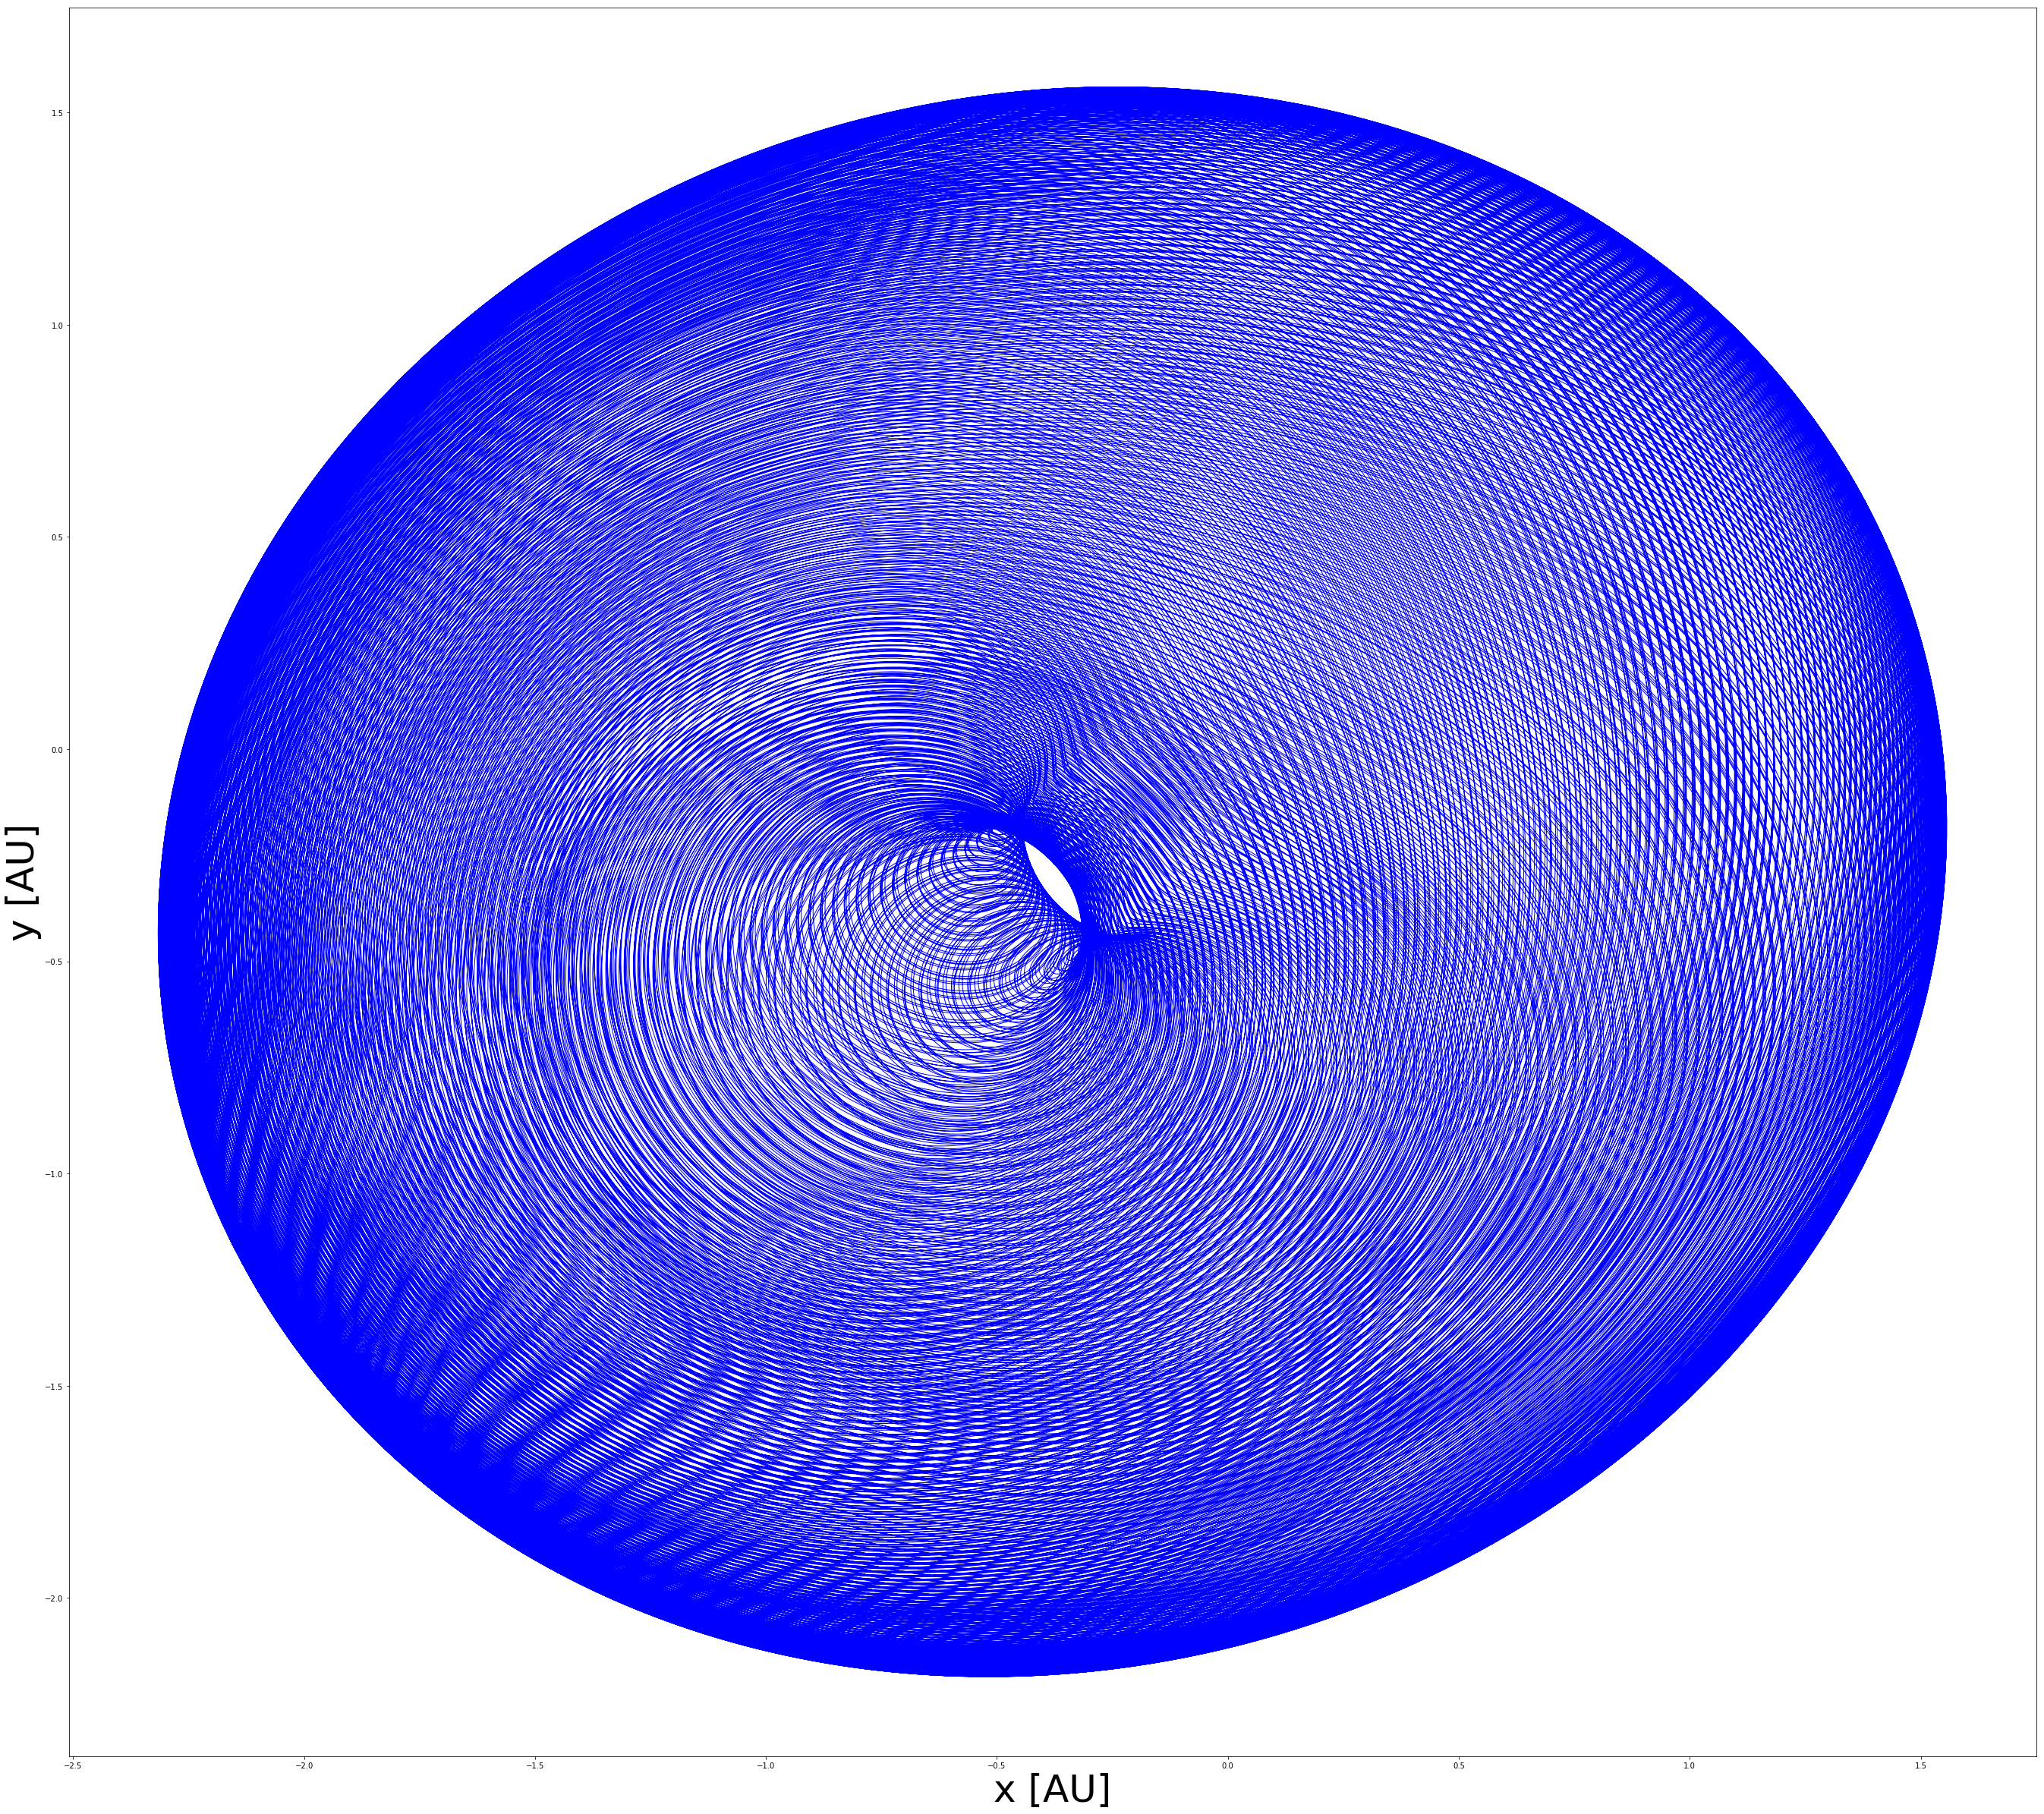

In [31]:
fig = plt.figure(figsize=(18, 16))
axes=fig.add_axes([-2.5,-2.5,2,2])
axes.plot(xdata5,ydata5, color='blue', linewidth=1)
#plt.plot(xdata5,ydata5)
#fig.suptitle("Geocentric Cruithne for " + str(times) + " steps and " + str(runs) + " runs", fontsize=20)
plt.xlabel('x [AU]', fontsize=50)
plt.ylabel('y [AU]', fontsize=50)
plt.show()

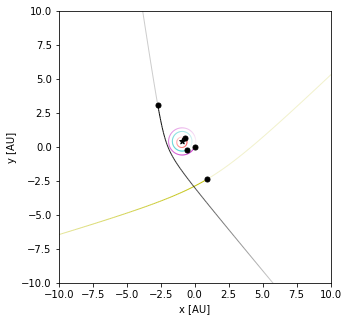

In [13]:
#sim.move_to_com()
#cruithne_data = []
for i in range(100):
    sim.dt = sim.particles[3].P/365. # set timeStep based on earth's orbital period
    sim.step()
    earth_val = sim.particles[3]

#    for index in range(5):
#        sim.particles[index].x = sim.particles[index].x - earth_val.x
#        sim.particles[index].y = sim.particles[index].y - earth_val.y
#        sim.particles[index].z = sim.particles[index].z - earth_val.z
#        sim.particles[index].vx = sim.particles[index].vx - earth_val.vx
#        sim.particles[index].vy = sim.particles[index].vy - earth_val.vy
#        sim.particles[index].vz = sim.particles[index].vz - earth_val.vz
    
    sim.particles[5].
    
    fig, ax = rebound.OrbitPlot(sim,fancy=False,color=True,unitlabel="[AU]",xlim=[-10.,10.],ylim=[-10.,10.])
    display(fig)
    plt.close(fig)
    clear_output(wait=True)

In [72]:
x_data1 = []
y_data1 = []
x_data2 = []
y_data2 = []
x_data3 = []
y_data3 = []

times = 100*365

for i in range(times):
    sim.dt = sim.particles[3].P*5
#   sim.integrate(sim.t+0.001)
    sim.step()
    cruithne_values = sim.particles[-1]
    earth_values = sim.particles[3]
    sun_values = sim.particles[0]
    x_data1.append((cruithne_values.x - earth_values.x))
    y_data1.append((cruithne_values.y - earth_values.y))
    x_data2.append(earth_values.x - earth_values.x)
    y_data2.append(earth_values.y - earth_values.y)
    x_data3.append(sun_values.x)
    y_data3.append(sun_values.y)
    

In [40]:
    x_data1.append((cruithne_values.x - earth_values.x))
    y_data1.append((cruithne_values.y - earth_values.y))
    x_data2.append(earth_values.x - earth_values.x)
    y_data2.append(earth_values.y - earth_values.y)
    x_data3.append(sun_values.x)
    y_data3.append(sun_values.y)

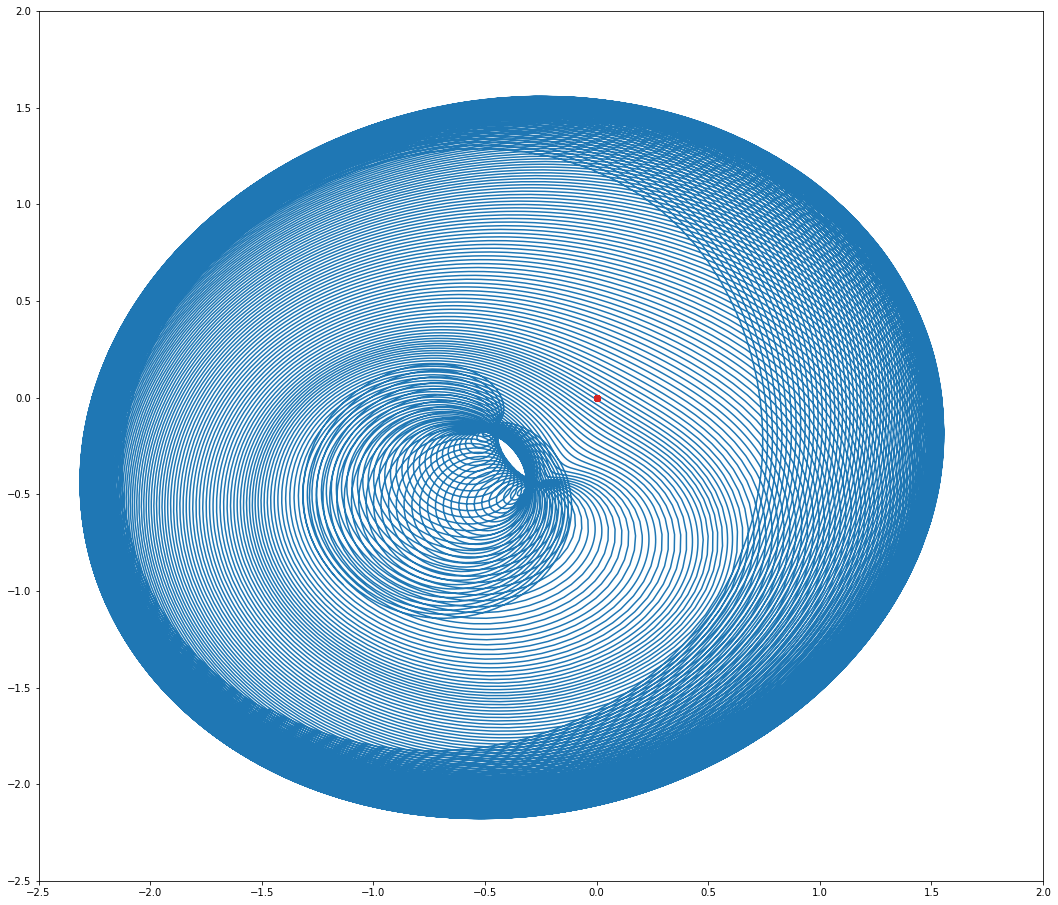

In [73]:
fig = plt.figure(figsize=(18, 16))
ax = fig.add_subplot(1,1,1)
ax.plot(x_data1, y_data1, color='tab:blue')
#ax.plot(x_data2, y_data2, color='tab:red')
ax.plot(x_data2, y_data2, color='tab:red', marker='o')
#fig, ax = plt.subplots()
#ax.plot(x_list, y_list)
ax.set_xlim([-2.5,2.])
ax.set_ylim([-2.5,2.])
plt.show()

In [11]:
def distance_calc(part1, part2):
    calc_dist = math.sqrt(((sim.particles[part1].x - sim.particles[part2].x)**2) +
                          ((sim.particles[part1].y - sim.particles[part2].y)**2) +
                         ((sim.particles[part1].z - sim.particles[part2].z)**2))
    return calc_dist

In [18]:
# Cruithne closest approach
times = 36500
dist_data = [] # list of distances from earth to Cruithne

sim.dt = sim.particles[3].P/365. # timeStep equivalent to a single day
for i in range(times):
    sim.step()
    dist_data.append(distance_calc(3,-1)) 
    

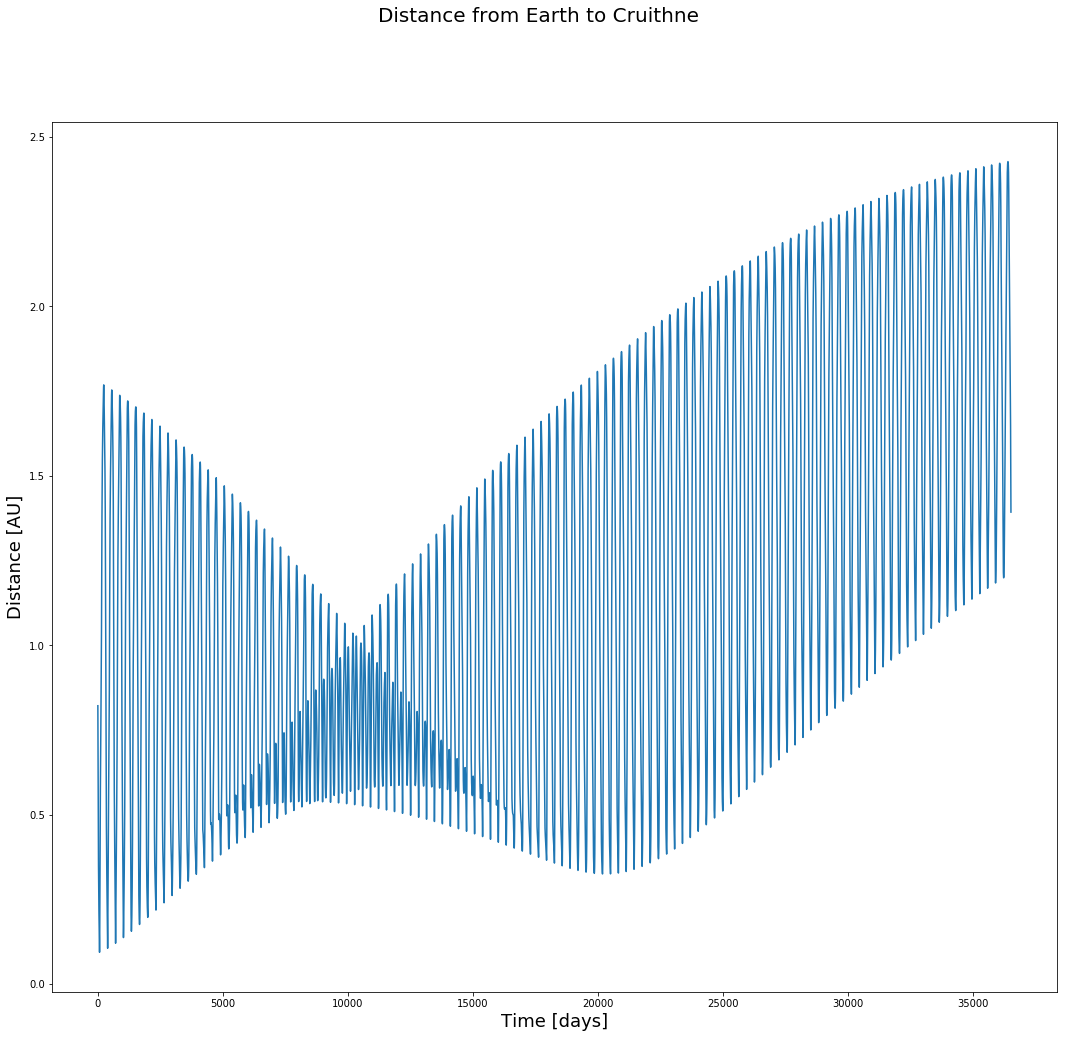

In [20]:
#plt.plot(dist_data)
#plt.xlabel('Time [days]')
#plt.ylabel('Distance [AU]')
#plt.title("Distance from Earth to Cruithne")
#plt.show()

fig = plt.figure(figsize=(18, 16))
plt.plot(dist_data)
fig.suptitle("Distance from Earth to Cruithne", fontsize=20)
plt.xlabel('Time [days]', fontsize=18)
plt.ylabel('Distance [AU]', fontsize=18)
plt.show()
fig.savefig('distanceGraph.pdf')